# TCR INNOVATION DEEP LEARNING PROJECT 
Project Title : Detecting healthy and unhealthy eye, trained using Inception V2 Imagenet pretrained model.

Dataset : Manually collected from various platform like google, kaggle, etc

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pixellib
from pixellib.tune_bg import alter_bg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array
from tensorflow.keras.preprocessing import image
from PIL import Image

#Importing Necessary packages and libraries

In [3]:
dataset= r"D:\books\ML\DATASETS\Eye Diseases Dataset"
bulging_eyes =r"D:\books\ML\DATASETS\Eye Diseases Dataset\Bulging_Eyes"
cataract_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Cataracts"
crossed_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Crossed_Eyes"
glaucomic_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Glaucoma"
uveitis_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Uveitis"
uveitis_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Uveitis"
healthy_eyes=r"D:\books\ML\DATASETS\Eye Diseases Dataset\Healthy_eyes"

#Reading File locations

In [49]:
vals = [bulging_eyes,cataract_eyes,crossed_eyes,glaucomic_eyes,uveitis_eyes,healthy_eyes]
print("the no of bulging eyes images are:", os.listdir(vals[0]).__len__())
print("the no of cataract eyes images are:", os.listdir(vals[1]).__len__())
print("the no of crossed eyes images are:", os.listdir(vals[2]).__len__())
print("the no of glaucomic eyes images are:", os.listdir(vals[3]).__len__())
print("the no of uveitis eyes images are:", os.listdir(vals[4]).__len__())
print("the no of healthy eyes images are:", os.listdir(vals[5]).__len__())

the no of bulging eyes images are: 27
the no of cataract eyes images are: 42
the no of crossed eyes images are: 114
the no of glaucomic eyes images are: 31
the no of uveitis eyes images are: 35
the no of healthy eyes images are: 42


In [6]:
pathdir = [bulging_eyes,cataract_eyes,crossed_eyes,glaucomic_eyes,uveitis_eyes, healthy_eyes]
classes =['Bulging Eyes','Cataract Eyes', 'Crossed Eyes', 'Glaucomic Eyes', 'Uveitis Eyes', 'Healthy Eyes']
filepath= []
labels=[]
img_size=[]
for i, j in zip(pathdir,classes):
    filelist= os.listdir(i)
    print(filelist)
    for vals in filelist:
        x= os.path.join(i, vals)
        img= Image.open(x)
        img_size.append(img)
        filepath.append(x)
        labels.append(j)
print (filepath.__len__(), labels.__len__(), )

#here we have created a path directory and class directory for our datasets. 
#Then we have created two empty list i.e. filepath and lables. 
#then we run a for loop i,j on pathdir and classes together.
#then we run another for loop for filelist in which we join the path and the name of the image.
#then we join the filepath with the images and labels with the classes

['image-10.jpeg', 'image-11.jpeg', 'image-12.jpeg', 'image-13.jpeg', 'image-14.jpeg', 'image-15.jpeg', 'image-2.jpeg', 'image-3.jpeg', 'image-4.jpeg', 'image-5.jpeg', 'image-6.jpeg', 'image-7.jpeg', 'image-9.jpeg', 'image.jpeg', 'images-10.jpeg', 'images-11.jpeg', 'images-12.jpeg', 'images-13.jpeg', 'images-15.jpeg', 'images-2.jpeg', 'images-3.jpeg', 'images-5.jpeg', 'images-6.jpeg', 'images-7.jpeg', 'images-8.jpeg', 'images-9.jpeg', 'images.jpeg']
['image-10.jpeg', 'image-12.jpeg', 'image-13.jpeg', 'image-14.jpeg', 'image-16.jpeg', 'image-17.jpeg', 'image-18.jpeg', 'image-19.jpeg', 'image-2.jpeg', 'image-20.jpeg', 'image-22.jpeg', 'image-23.jpeg', 'image-24.jpeg', 'image-4.jpeg', 'image-5.jpeg', 'image-6.jpeg', 'images-10.jpeg', 'images-11.jpeg', 'images-12.jpeg', 'images-13.jpeg', 'images-15.jpeg', 'images-16.jpeg', 'images-18.jpeg', 'images-19.jpeg', 'images-20.jpeg', 'images-23.jpeg', 'images-24.jpeg', 'images-25.jpeg', 'images-26.jpeg', 'images-29.jpeg', 'images-30.jpeg', 'images-

UnidentifiedImageError: cannot identify image file 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Healthy_eyes\\images-23.jpeg'

In [7]:
filepath

['D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-10.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-11.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-12.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-13.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-14.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-15.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-2.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-3.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-4.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-5.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-6.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_Eyes\\image-7.jpeg',
 'D:\\books\\ML\\DATASETS\\Eye Diseases Dataset\\Bulging_E

In [8]:
img_size

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=243x207 at 0x1EBA9A4ACA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=284x177 at 0x1EBA9A4AC70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194 at 0x1EBA9A4AD90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=364x138 at 0x1EBA9A4ADF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x195 at 0x1EBA9A4AE50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x187 at 0x1EBA9A4AEB0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=258x196 at 0x1EBA9A4AF10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=287x175 at 0x1EBA9A4AF70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=306x165 at 0x1EBA9A4AFD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=289x174 at 0x1EBB2E52A00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x191 at 0x1EBB2E4A940>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x184 at 0x1EBB2E4AFA0>,
 <PI

In [9]:
labels

['Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Bulging Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 'Cataract Eyes',
 

In [10]:
dataset= list(zip(filepath, labels))
df=pd.DataFrame(dataset, columns=['Filepath', 'Labels'])

#here we have merged the filepath and labels using the zip function and then created a dataframe df

In [11]:
df.head(10)

,Filepath,Labels
0,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
1,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
2,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
3,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
4,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
5,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
6,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
7,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
8,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes
9,D:\books\ML\DATASETS\Eye Diseases Dataset\Bulg...,Bulging Eyes


<function matplotlib.pyplot.show(close=None, block=None)>

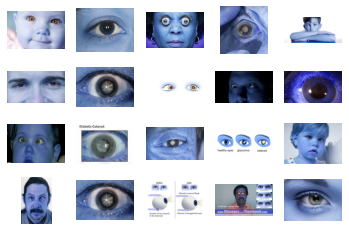

In [12]:
for i in range(0,20):
    vals= np.random.randint(1, len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.Filepath[vals]))
    plt.axis('off') #axis off means it will not show xticks and yticks
plt.show

#basically here we are plotting 20 random images selecting from the filepath of the df dataframe 

In [13]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df, test_size=0.1, random_state=0)
Train_new, valid = train_test_split(Train, test_size=0.1, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

#Dividing the dataset for training our model

(236, 2) (27, 2) (212, 2) (24, 2)


In [14]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=0, height_shift_range=0.1, shear_range=0.1,
zoom_range=0.1, horizontal_flip=True, vertical_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

#here we use the image data generator package to hypertune our training data by doing image preprocessing like rescaling & normalizing, etc..
#We do the same in both test, train and valid too.

In [15]:
train_gen =train_datagen.flow_from_dataframe(dataframe=Train_new, x_col= 'Filepath', y_col='Labels', batch_size=16, target_size=(150,150),
                                           class_mode='categorical',classes=['Bulging Eyes', 'Cataract Eyes', 'Crossed Eyes', 'Glaucomic Eyes', 'Uveitis Eyes', 'Healthy Eyes'], shuffle=True)
valid_gen =train_datagen.flow_from_dataframe(dataframe=valid, x_col= 'Filepath', y_col='Labels', batch_size=16, target_size=(150,150),
                                           class_mode='categorical', shuffle=True)
test_gen= test_datagen.flow_from_dataframe(dataframe=Test, x_col='Filepath', y_col='Labels', batch_size=16, 
                                          target_size=(150,150), class_mode='categorical',classes=['Bulging Eyes', 'Cataract Eyes', 'Crossed Eyes', 'Glaucomic Eyes', 'Uveitis Eyes', 'Healthy Eyes'], shuffle=False)
print('Classes: '+str(classes))
print(len(classes))

#here we apply the above preprocessing into our real time dataset.

Found 212 validated image filenames belonging to 6 classes.
Found 24 validated image filenames belonging to 6 classes.
Found 27 validated image filenames belonging to 6 classes.
Classes: ['Bulging Eyes', 'Cataract Eyes', 'Crossed Eyes', 'Glaucomic Eyes', 'Uveitis Eyes', 'Healthy Eyes']
6


In [16]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)
print(valid_gen[0][0].shape)
print(test_gen[0][0].shape)

{'Bulging Eyes': 0, 'Cataract Eyes': 1, 'Crossed Eyes': 2, 'Glaucomic Eyes': 3, 'Healthy Eyes': 4, 'Uveitis Eyes': 5}
(16, 150, 150, 3)
(16, 150, 150, 3)
(16, 150, 150, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

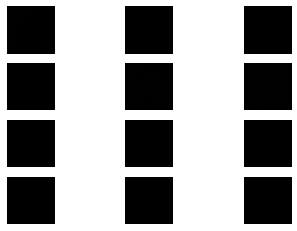

In [17]:
for i in range(0,12):
    val= train_gen[0][0][i]
    vals=val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D

base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape=(150,150,3), include_top=False)
model= Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation= 'softmax'))

#here we train the model using google's inception V2 pretrained models (it has 7 convolution layers)
#because this function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet
#we use sigmoid as the activation function for the output layer and relu for the hidden layers

In [41]:
model.compile(optimizer='Adam',loss='categorical_crossentropy' , metrics=['accuracy'])
history = model.fit(train_gen, validation_data=valid_gen, epochs=30, verbose=2)

#we got a large accuracy for training dataset compared to that for validation dataset. this means our model is overfitting.
#the reason for overfitting might be due to less avaialbitily of approriate images for each type of the 5 types of disease.

Epoch 1/30
14/14 - 126s - loss: 1.4555 - accuracy: 0.5094 - val_loss: 1.6496 - val_accuracy: 0.5417
Epoch 2/30
14/14 - 73s - loss: 1.2258 - accuracy: 0.5896 - val_loss: 34.6479 - val_accuracy: 0.0833
Epoch 3/30
14/14 - 74s - loss: 1.1250 - accuracy: 0.6132 - val_loss: 30.3007 - val_accuracy: 0.0833
Epoch 4/30
14/14 - 75s - loss: 0.9106 - accuracy: 0.6651 - val_loss: 157.9605 - val_accuracy: 0.1667
Epoch 5/30
14/14 - 75s - loss: 0.7422 - accuracy: 0.7406 - val_loss: 1.5029 - val_accuracy: 0.3750
Epoch 6/30
14/14 - 61s - loss: 0.8183 - accuracy: 0.6981 - val_loss: 3.4752 - val_accuracy: 0.5417
Epoch 7/30
14/14 - 66s - loss: 0.7626 - accuracy: 0.7264 - val_loss: 10.4912 - val_accuracy: 0.2917
Epoch 8/30
14/14 - 73s - loss: 0.7489 - accuracy: 0.7217 - val_loss: 3.7805 - val_accuracy: 0.4167
Epoch 9/30
14/14 - 73s - loss: 0.6896 - accuracy: 0.7453 - val_loss: 7.7297 - val_accuracy: 0.1667
Epoch 10/30
14/14 - 74s - loss: 0.6469 - accuracy: 0.7736 - val_loss: 8.3089 - val_accuracy: 0.4583
Epo

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               196736    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 54,534,246
Trainable params: 54,473,702
Non-trainable params: 60,544
_________________________________________________________________


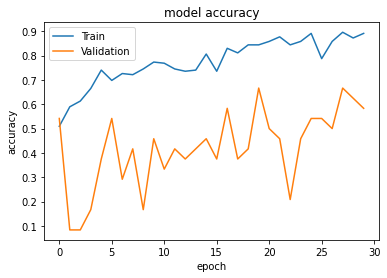

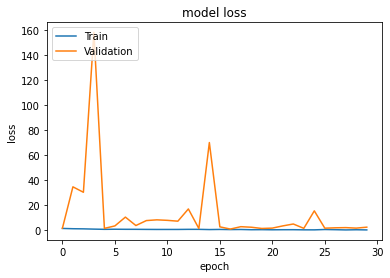

In [43]:
#for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#plotting for the evaluation of overfitting/underfitting

In [44]:
y_pred=model.predict(test_gen)
#y_pred=(y_pred>0.5)
y_pred

array([[1.72786837e-04, 3.80984653e-04, 9.96125400e-01, 2.01355689e-03,
        3.95978917e-04, 9.11243260e-04],
       [5.19609093e-05, 2.01304350e-03, 1.43515756e-02, 8.31728697e-01,
        7.32970715e-04, 1.51121601e-01],
       [3.49010110e-01, 1.05750319e-02, 5.97141862e-01, 1.04361763e-02,
        2.47815568e-02, 8.05513188e-03],
       [4.94207680e-01, 1.24977231e-01, 4.78479266e-02, 3.23322058e-01,
        3.02655878e-03, 6.61854120e-03],
       [9.36219777e-08, 1.34283638e-07, 9.99999285e-01, 2.15852452e-07,
        1.81045621e-07, 4.26897202e-08],
       [4.00583231e-05, 1.23144810e-05, 9.99853611e-01, 5.66940580e-05,
        1.27766607e-05, 2.46016007e-05],
       [2.84773647e-03, 2.86885770e-03, 8.18128347e-01, 1.33420199e-01,
        2.87471246e-02, 1.39876381e-02],
       [2.29590782e-03, 4.17223454e-01, 1.98644027e-01, 3.77962619e-01,
        1.17134058e-03, 2.70267460e-03],
       [1.14038177e-02, 1.82554882e-03, 9.81283367e-01, 4.90743201e-03,
        2.45614967e-04, 

In [45]:
#face_cascade_classifier=cv2.CascadeClassifier(r"C:\Users\shrey\Downloads\haarcascade_frontalface_default.xml")
eyes_cascade_classifier= cv2.CascadeClassifier(r"C:\Users\shrey\Downloads\haarcascade_eye.xml")

In [51]:
cam= cv2.VideoCapture(0)
count =0

patient_name = input("Enter your name : \n")
gender = str(input("What is your Gender? \n"))
if gender == 'male':
    print("Mr." +' '+ patient_name)
elif gender== 'female' :
    print("Miss" +' '+ patient_name)
else:
    print('Please enter a valid Gender!')

patient_age = int(input("Enter your age : \n"))
print(str(patient_age) +' '+ "Years")

#blur_bg= alter_bg(model_type="pb")
#blur_bg.load_pascalvoc_model(r"C:\Users\shrey\Downloads\xception_pascalvoc.pb")
#seq, result = blur_bg.blur_camera(cam, moderate=True, show_frames=True)

while cam.isOpened():
    _, img=cam.read()
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes= eyes_cascade_classifier.detectMultiScale(gray, 1.1, 4)
    
    for (x,y,w,h) in eyes:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    
    cv2.imshow('img',img)
    if cv2.waitKey(1) == 27:  #closes with esc button
        print("Close")
        break
    elif cv2.waitKey(1) ==32: #captures with space bar
        print("Capture" +str(count)+"saved")
        filepath='C:/Users/shrey/Documents/Eye Disease Detection Project/Project Capture Images/img'+str(count)+'_'+patient_name+'.jpg'
        cv2.imwrite(filepath, img)
        count +=1


cam.release()
cv2.destroyAllWindows()

Enter your name : 
ankit
What is your Gender? 
male
Mr. ankit
Enter your age : 
20
20 Years
Capture0saved
Close


In [27]:
valid_gen.class_indices

{'Bulging Eyes': 0,
 'Cataract Eyes': 1,
 'Crossed Eyes': 2,
 'Glaucomic Eyes': 3,
 'Healthy Eyes': 4,
 'Uveitis Eyes': 5}

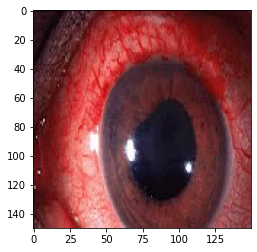

Person has Bulging Eyes


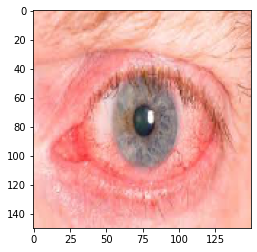

Person has Bulging Eyes


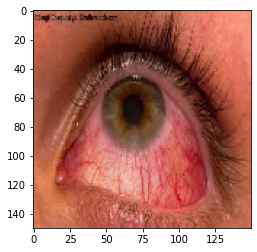

Person has Bulging Eyes


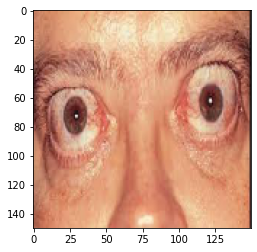

Person has Bulging Eyes


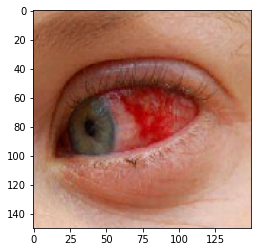

Person has Bulging Eyes


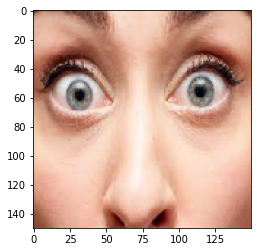

Person has Bulging Eyes


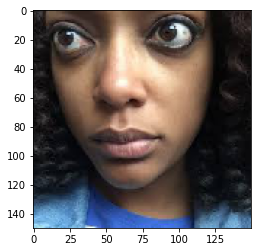

Person has Bulging Eyes


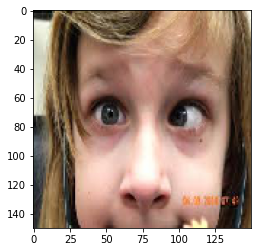

Person has Bulging Eyes


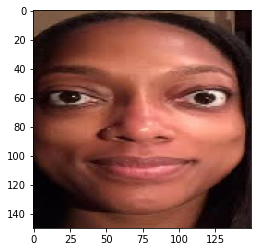

Person has Bulging Eyes


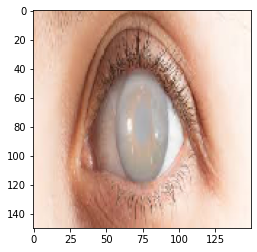

Person has Bulging Eyes


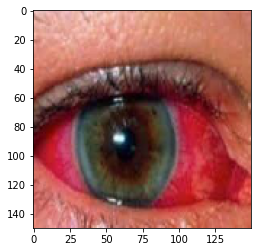

Person has Bulging Eyes


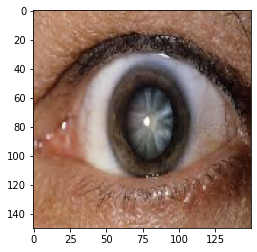

Person has Bulging Eyes


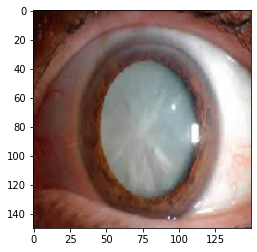

Person has Bulging Eyes


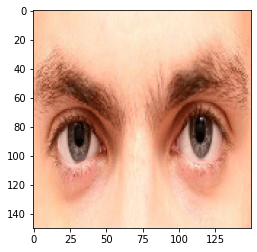

Person has Bulging Eyes


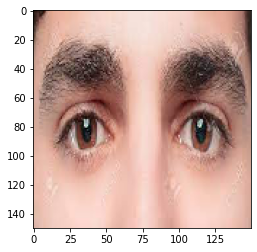

Person has Bulging Eyes


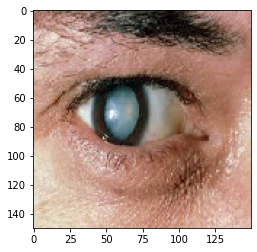

Person has Bulging Eyes


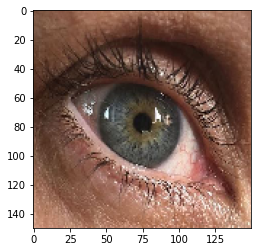

Person has Bulging Eyes


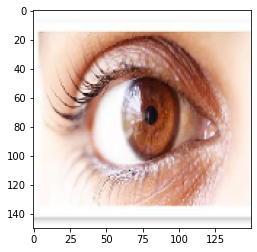

Person has Bulging Eyes


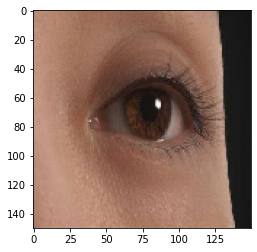

Person has Bulging Eyes


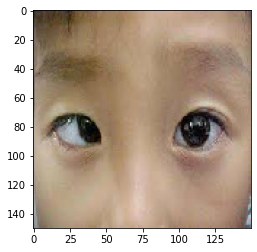

Person has Bulging Eyes


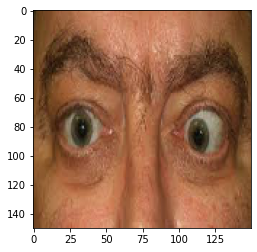

Person has Bulging Eyes


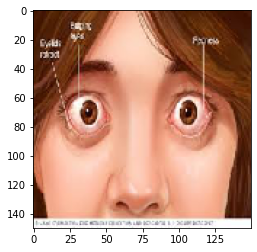

Person has Bulging Eyes


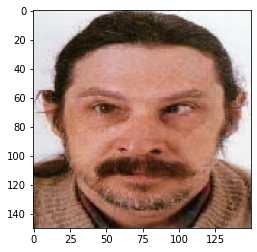

Person has Bulging Eyes


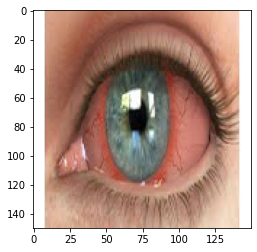

Person has Bulging Eyes


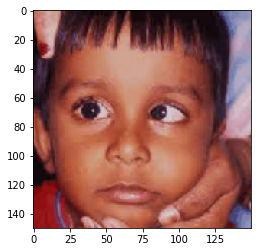

Person has Bulging Eyes


In [48]:
path= 'C:/Users/shrey/Documents/Eye Disease Detection Project/Project Capture Images'
for i in os.listdir(path):
    img= image.load_img(path+'//'+ i, target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X=np.expand_dims(X, axis=0)
    images= np.vstack([X])
    
    vals = model.predict(images)
    if vals.all() == 0:
        print("Person has Bulging Eyes")
    elif vals.all() == 1:
        print("Person has Cataract Eyes")
    elif vals.all() == 2:
        print("Person has Crossed Eyes")
    elif vals.all() == 3:
        print("Person has Glaucomic Eyes")
    elif vals.all() == 4:
        print("Person has Healthy Eyes")
    else:
        print("Person has Uveitis Eyes")
        
               
#Only few of the images are detected and classified correctly.

# Thank You!
By- Shreyas Kumar Tah